# Aspect Classification

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import xml.etree.ElementTree as ET, getopt, logging, sys, random, re, copy, os
from lxml import etree
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

from keras import backend as K

Using TensorFlow backend.


In [7]:
x_train

array([[1576,   55,  608, ...,    0,    0,    0],
       [   4,   26,  231, ...,    0,    0,    0],
       [   4,    7,   32, ...,    0,    0,    0],
       ...,
       [ 223,    4,   89, ...,    0,    0,    0],
       [   1,  599, 3416, ..., 3421,  808,   25],
       [3426,    6, 1575, ..., 3432,    1,   72]])

In [8]:
train_aspects

[]

In [39]:
len(test_aspects)

90

In [41]:
predictions1

array([[0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.60385084],
       [0.603

In [19]:
train_sentences

[['Judging from previous posts this used to be a good place, but not any longer.',
  'We, there were four of us, arrived at noon - the place was empty - and the staff acted like we were imposing on them and they were very rude.',
  'They never brought us complimentary noodles, ignored repeated requests for sugar, and threw our dishes on the table.',
  'The food was lousy - too sweet or too salty and the portions tiny.',
  'After all that, they complained to me about the small tip.',
  'Avoid this place!'],
 ['I have eaten at Saul, many times, the food is always consistently, outrageously good.',
  'Saul is the best restaurant on Smith Street and in Brooklyn.',
  'The duck confit is always amazing and the foie gras terrine with figs was out of this world.',
  'The wine list is interesting and has many good values.',
  'For the price, you cannot eat this well in Manhattan.'],
 ['I was very disappointed with this restaurant.',
  'Ive asked a cart attendant for a lotus leaf wrapped rice an

In [21]:
x_train

array([[1576,   55,  608, ...,    0,    0,    0],
       [   4,   26,  231, ...,    0,    0,    0],
       [   4,    7,   32, ...,    0,    0,    0],
       ...,
       [ 223,    4,   89, ...,    0,    0,    0],
       [   1,  599, 3416, ..., 3421,  808,   25],
       [3426,    6, 1575, ..., 3432,    1,   72]])

In [23]:
train1

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,


In [25]:
train_reviews

['Judging from previous posts this used to be a good place, but not any longer. We, there were four of us, arrived at noon - the place was empty - and the staff acted like we were imposing on them and they were very rude. They never brought us complimentary noodles, ignored repeated requests for sugar, and threw our dishes on the table. The food was lousy - too sweet or too salty and the portions tiny. After all that, they complained to me about the small tip. Avoid this place!',
 'I have eaten at Saul, many times, the food is always consistently, outrageously good. Saul is the best restaurant on Smith Street and in Brooklyn. The duck confit is always amazing and the foie gras terrine with figs was out of this world. The wine list is interesting and has many good values. For the price, you cannot eat this well in Manhattan.',
 'I was very disappointed with this restaurant. Ive asked a cart attendant for a lotus leaf wrapped rice and she replied back rice and just walked away. I had to 

# Word Level 

In [1]:
import json

In [2]:
review_list=[]
aspect_list=[]

In [80]:
file = r'C:/Users/Vaibhav/Documents/Practicum/AspectClass/vistara.json1'

In [81]:
info = []
for line in open(file, encoding='utf-8'):
    info.append(json.loads(line))

In [82]:
label = []
count = 0
totalLabelCount = {}
for i in range(len(info)):
    l = len(info[i]['labels'])
    for j in range(l):
        info[i]['labels'][j][-1] = info[i]['labels'][j][-1].lower()
        lbl = (info[i]['labels'][j][-1])
        label.append(lbl)
        u = set(label)
        unique_list = list(u)
        if lbl in unique_list:
            count = count + info[i]['labels'][j].count(lbl)
            totalLabelCount[lbl] = count

In [83]:


for i in range(len(info)):
    l = len(info[i]['labels'])
    for j in range(l):
        lbl = info[i]['labels'][j][-1]
        start = info[i]['labels'][j][0]
        end = info[i]['labels'][j][1]
        txt = info[i]['text'][start:end].strip()
        review_list.append(txt)
        aspect_list.append({lbl})

In [84]:
    for j in range(l):
        lbl = info[i]['labels'][j][-1]
        start = info[i]['labels'][j][0]
        end = info[i]['labels'][j][1]
        txt = info[i]['text'][start:end].strip()

In [85]:
len(aspect_list)

3955

In [86]:
len(review_list)

3955

In [90]:
review_list_train=review_list[:3100]
review_list_test=review_list[3100:]

aspect_list_train=aspect_list[:3100]
aspect_list_test=aspect_list[3100:]

In [91]:
train_reviews = review_list_train
train_aspects = aspect_list_train
test_reviews = review_list_test
test_aspects = aspect_list_test


In [92]:
train_aspects

[{'possession'},
 {'possession'},
 {'staff'},
 {'staff'},
 {'possession'},
 {'possession'},
 {'possession'},
 {'possession'},
 {'off-flight service'},
 {'off-flight service'},
 {'positive opinion'},
 {'food'},
 {'food'},
 {'entertainment'},
 {'seat'},
 {'seat'},
 {'food'},
 {'entertainment'},
 {'positive opinion'},
 {'inflight-service'},
 {'food'},
 {'food'},
 {'inflight-service'},
 {'staff'},
 {'off-flight service'},
 {'off-flight service'},
 {'staff'},
 {'off-flight service'},
 {'off-flight service'},
 {'off-flight service'},
 {'inflight-service'},
 {'staff'},
 {'staff'},
 {'staff'},
 {'staff'},
 {'positive opinion'},
 {'positive opinion'},
 {'inflight-service'},
 {'inflight-service'},
 {'inflight-service'},
 {'inflight-service'},
 {'staff'},
 {'staff'},
 {'staff'},
 {'staff'},
 {'cabin'},
 {'cabin'},
 {'cabin'},
 {'cabin'},
 {'staff'},
 {'possession'},
 {'off-flight service'},
 {'off-flight service'},
 {'off-flight service'},
 {'off-flight service'},
 {'off-flight service'},
 {'off-

In [14]:
def getSentences(file):  #redefine only this function
  tree = ET.parse(file, etree.XMLParser(recover=True, encoding="utf-8"))
  root = tree.getroot()
  s = []
  p = []
  for review in root.findall('Review'):
    sent = []
    sent_characteristics = []
    for sentences in review.findall('sentences'):
      for sentence in sentences.findall('sentence'):
        text = sentence.find('text').text
        sent.append(text)
        polarity = []
        for opinions in sentence.findall('Opinions'):
          for opinion in opinions.findall('Opinion'):
            elem = [opinion.get('category'), opinion.get('polarity'), opinion.get('target'), opinion.get('from'), opinion.get('to')]
            polarity.append(elem)
        sent_characteristics.append(polarity)
    s.append(sent)
    p.append(sent_characteristics)
        
  return s, p
  
train_sentences, train_adnotations = getSentences(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\train.xml')
test_sentences, test_adnotations = getSentences(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\test.xml')

train_reviews = []
train_aspects = []
test_reviews = []
test_aspects = []

for review in train_sentences:
  train_reviews.append(' '.join(review))
    
for ta in train_adnotations:
  aspect = set()
  for adnotation_set in ta:
    for a in adnotation_set:
      aspect.add(a[0])
  train_aspects.append(aspect)

for review in test_sentences:
  test_reviews.append(' '.join(review))
  
for ta in test_adnotations:
  aspect = set()
  for adnotation_set in ta:
    for a in adnotation_set:
      aspect.add(a[0])
  test_aspects.append(aspect)

def getLabels(aspects):
	#print(unique_aspects)
	#Create train labels
	restaurant_general = []
	food_quality = []
	restaurant_misc = []
	food_prices = []
	drinks_quality = []
	location_general = []
	restaurant_prices = []
	ambience_general = []
	drinks_style_options = []
	service_general = []
	drinks_prices = []
	food_style_options = []
###
	for aspect in aspects:
		if 'food' in aspect:
			restaurant_general.append(1)
		else:
			restaurant_general.append(0)
			
		if 'seat' in aspect:
			food_quality.append(1)
		else:
			food_quality.append(0)
			
		if 'bookings' in aspect:
			restaurant_misc.append(1)
		else:
			restaurant_misc.append(0)
			
		if 'inflight-service' in aspect:
			food_prices.append(1)
		else:
			food_prices.append(0)
			
		if 'possession' in aspect:
			drinks_quality.append(1)
		else:
			drinks_quality.append(0)
			
		if 'staff' in aspect:
			location_general.append(1)
		else:
			location_general.append(0)
			
		if 'cabin' in aspect:
			restaurant_prices.append(1)
		else:
			restaurant_prices.append(0)
			
		if 'entertainment' in aspect:
			ambience_general.append(1)
		else:
			ambience_general.append(0)
			
		if 'off-flight service' in aspect:
			drinks_style_options.append(1)
		else:
			drinks_style_options.append(0)
			
		if 'neutral opinion' in aspect:
			service_general.append(1)
		else:
			service_general.append(0)
			
		if 'positive opinion' in aspect:
			drinks_prices.append(1)
		else:
			drinks_prices.append(0)
			
		if 'negative opinion' in aspect:
			food_style_options.append(1)
		else:
			food_style_options.append(0)
				
	return restaurant_general, food_quality, restaurant_misc, food_prices, drinks_quality, location_general, restaurant_prices, ambience_general, drinks_style_options,service_general, drinks_prices, food_style_options
	
#Test and Train labels
test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11, test12 = getLabels(test_aspects)
test_labels = [test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11, test12]

train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12 = getLabels(train_aspects)
train_labels = [train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12]

#Vectorizing data
vectorizer = CountVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer.fit(train_reviews)

x_train = vectorizer.transform(train_reviews)
x_test = vectorizer.transform(test_reviews)

input_dim = x_train.shape[1]

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_reviews)

x_train = tokenizer.texts_to_sequences(train_reviews)
x_test = tokenizer.texts_to_sequences(test_reviews)
vocab_size = len(tokenizer.word_index) + 1 

maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)

#Pretrained Word Embeddings
def create_embedding_matrix(filepath, word_index, embedding_dim):
	vocab_size = len(word_index) + 1
	embedding_matrix = np.zeros((vocab_size, embedding_dim))
	
	with open(filepath, encoding='utf-8') as f:
		for line in f:
			word, *vector = line.split()
			if word in word_index:
				idx = word_index[word]
				embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

	return embedding_matrix

embedding_dim = 200
embedding_matrix = create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, embedding_dim)

nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis = 1))
#print(nonzero_elements / vocab_size)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def getPredictions(x_train, x_test, train, test):
	embedding_dim = 200
	embedding_matrix = create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, embedding_dim)
	model = Sequential()
	model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length = maxlen, trainable = True))
	model.add(layers.Conv1D(64, 3, activation = 'relu'))
	model.add(layers.GlobalMaxPool1D())
	model.add(layers.Dense(10, activation='relu'))
	model.add(layers.Dense(1, activation='sigmoid'))
	model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1, 'accuracy'])
	#model.summary()

	history = model.fit(x_train, train, epochs = 20, verbose = False, validation_data = (x_test, test), batch_size = 10)
	val = model.evaluate(x_train, train, verbose = False)
	val = model.evaluate(x_test, test, verbose = False)

	predictions = model.predict(x_test)
	return predictions
	
print("Getting Predictions1")
predictions1 = getPredictions(x_train, x_test, train1, test1)
print("Getting Predictions2")
predictions2 = getPredictions(x_train, x_test, train2, test2)
print("Getting Predictions3")
predictions3 = getPredictions(x_train, x_test, train3, test3)
print("Getting Predictions4")
predictions4 = getPredictions(x_train, x_test, train4, test4)
print("Getting Predictions5")
predictions5 = getPredictions(x_train, x_test, train5, test5)
print("Getting Predictions6")
predictions6 = getPredictions(x_train, x_test, train6, test6)
print("Getting Predictions7")
predictions7 = getPredictions(x_train, x_test, train7, test7)
print("Getting Predictions8")
predictions8 = getPredictions(x_train, x_test, train8, test8)
print("Getting Predictions9")
predictions9 = getPredictions(x_train, x_test, train9, test9)
print("Getting Predictions10")
predictions10 = getPredictions(x_train, x_test, train10, test10)
print("Getting Predictions11")
predictions11 = getPredictions(x_train, x_test, train11, test11)
print("Getting Predictions12")
predictions12 = getPredictions(x_train, x_test, train12, test12)

predicted_aspects = []
nr = len(test_reviews)   #sentences)

for i in range(nr):
  predicted_aspect = []
  
  if predictions1[i] > 0.4:
    predicted_aspect.append('STAFF#GENERAL')
  if predictions2[i] > 0.4:
    predicted_aspect.append('STAFF#BEHAVIOUR')

  predicted_aspects.append(predicted_aspect)
    

#Evaluating the system
common_aspects = 0
relevant_aspects = 0
retrieved_aspects = 0

for i in range(nr):#range(nr):
  correct = set()
  for aspect in test_aspects[i]:
    correct.add(aspect)
  
  predicted = set()
  for aspect in predicted_aspects[i]:
    predicted.add(aspect)
    
  relevant_aspects = relevant_aspects + len(correct)
  retrieved_aspects = retrieved_aspects + len(predicted)
  common_aspects = common_aspects+len([aspect for aspect in predicted if aspect in correct])
  
print("Common aspects: ", common_aspects)
print("Retrieved aspects: ", retrieved_aspects)
print("Relevant aspects: ", relevant_aspects)
precision = common_aspects / retrieved_aspects if retrieved_aspects > 0 else 0
recall = common_aspects / relevant_aspects
f1_measure = 2 * precision * recall / (precision + recall)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1_measure)


'Getting Predictions1\nGetting Predictions2\nGetting Predictions3\nCommon aspects:  3\nRetrieved aspects:  3\nRelevant aspects:  2'

In [111]:
len(predictions1)

855

In [117]:
train1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,


In [116]:
test2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [96]:
test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11, test12 = getLabels(test_aspects)
test_labels = [test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11, test12]

train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12 = getLabels(train_aspects)
train_labels = [train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12]

90

In [112]:
train_aspects

[{'possession'},
 {'possession'},
 {'staff'},
 {'staff'},
 {'possession'},
 {'possession'},
 {'possession'},
 {'possession'},
 {'off-flight service'},
 {'off-flight service'},
 {'positive opinion'},
 {'food'},
 {'food'},
 {'entertainment'},
 {'seat'},
 {'seat'},
 {'food'},
 {'entertainment'},
 {'positive opinion'},
 {'inflight-service'},
 {'food'},
 {'food'},
 {'inflight-service'},
 {'staff'},
 {'off-flight service'},
 {'off-flight service'},
 {'staff'},
 {'off-flight service'},
 {'off-flight service'},
 {'off-flight service'},
 {'inflight-service'},
 {'staff'},
 {'staff'},
 {'staff'},
 {'staff'},
 {'positive opinion'},
 {'positive opinion'},
 {'inflight-service'},
 {'inflight-service'},
 {'inflight-service'},
 {'inflight-service'},
 {'staff'},
 {'staff'},
 {'staff'},
 {'staff'},
 {'cabin'},
 {'cabin'},
 {'cabin'},
 {'cabin'},
 {'staff'},
 {'possession'},
 {'off-flight service'},
 {'off-flight service'},
 {'off-flight service'},
 {'off-flight service'},
 {'off-flight service'},
 {'off-

In [114]:
predictions2

array([[0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.08387358],
       [0.083

In [115]:
predicted_aspects

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


# sentence level

In [11]:
import json
vlst_txt=[]
vlst_lbl=[]

In [12]:
file = r'C:\Users\Vaibhav\Documents\Practicum\AspectClass\emirates.json1'
info = []
for line in open(file, encoding='utf-8'):
    info.append(json.loads(line))

In [13]:
countbr=0

for i in range(len(info)):
    if (len(info[i]['labels']))==0:
        countbr+=1
        continue
        
    if countbr==3:
        break
    
    vlst_txt.append(info[i]['text'])
    
    lblset=set()
    for j in range(len(info[i]['labels'])):
        lblset.add(info[i]['labels'][j][2])
    vlst_lbl.append(lblset)
    
    countbr=0

In [14]:
len(vlst_txt)

100

In [16]:
print(vlst_lbl)

[{'Off-flight service', 'Negative Opinion'}, {'Off-flight service'}, {'Off-flight service', 'Bookings'}, {'Bookings'}, {'Bookings', 'Negative Opinion'}, {'Off-flight service'}, {'Bookings'}, {'Off-flight service', 'Bookings'}, {'Seat', 'Staff', 'Cabin', 'Negative Opinion'}, {'Bookings', 'Negative Opinion'}, {'Bookings', 'Entertainment'}, {'Seat', 'Bookings', 'Food'}, {'Off-flight service', 'Negative Opinion'}, {'Off-flight service'}, {'Off-flight service', 'Bookings'}, {'Seat', 'Staff', 'Cabin', 'Negative Opinion'}, {'Bookings', 'Negative Opinion'}, {'Bookings', 'Entertainment'}, {'Seat', 'Bookings', 'Food'}, {'Inflight-service', 'Positive Opinion', 'Food'}, {'Bookings'}, {'Seat', 'Off-flight service', 'Possession'}, {'Positive Opinion', 'Bookings', 'Entertainment', 'Food', 'Seat', 'Staff'}, {'Seat', 'Off-flight service', 'Bookings', 'Food'}, {'Off-flight service', 'Bookings'}, {'Positive Opinion', 'Off-flight service'}, {'Staff', 'Food'}, {'Seat', 'Positive Opinion', 'Off-flight servi

In [17]:

review_list_train=vlst_txt[:750]
review_list_test=vlst_txt[750:]

aspect_list_train=vlst_lbl[:750]
aspect_list_test=vlst_lbl[750:]


train_reviews = review_list_train
train_aspects = aspect_list_train
test_reviews = review_list_test
test_aspects = aspect_list_test

In [18]:
len(vlst_lbl)

900

In [99]:
predictions11

array([[0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.22162919],
       [0.221

In [64]:
test_reviews

['our flight to barbados was excellent the cabin crew were very attentive courteous and helpful nothing to complain about at all however our homeward flight was not as we expected because the plane was changed to a different one so the seats we had booked two seats on the',
 'virgin just fine in face very good indeed the only headache was inconsistent access to the lounge allowed in boston for delta codeshare passengers with delta sky club membership but not allowed on the return trip from heathrow does not does not make much sense for delta not to',
 'a bit of a mixed bag staff great on the plane and in london and orlando and helpful plane was ok but we opted for the economy delight seats which were the economy seats with about three inches more legroom nothing else and not even a foot rest felt rather let down there for the extra money we had paid no overnigt bag either face mask toothpaste etc usb not working on one seat menu was different to what actually appeared just generally no

In [65]:
prediction

NameError: name 'predictions' is not defined

In [101]:
test1

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

In [17]:
def getSentences(file):  #redefine only this function
  tree = ET.parse(file, etree.XMLParser(recover=True, encoding="utf-8"))
  root = tree.getroot()
  s = []
  p = []
  for review in root.findall('Review'):
    sent = []
    sent_characteristics = []
    for sentences in review.findall('sentences'):
      for sentence in sentences.findall('sentence'):
        text = sentence.find('text').text
        sent.append(text)
        polarity = []
        for opinions in sentence.findall('Opinions'):
          for opinion in opinions.findall('Opinion'):
            elem = [opinion.get('category'), opinion.get('polarity'), opinion.get('target'), opinion.get('from'), opinion.get('to')]
            polarity.append(elem)
        sent_characteristics.append(polarity)
    s.append(sent)
    p.append(sent_characteristics)
        
  return s, p
  
train_sentences, train_adnotations = getSentences(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\train.xml')
test_sentences, test_adnotations = getSentences(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\test.xml')

train_reviews = []
train_aspects = []
test_reviews = []
test_aspects = []

for review in train_sentences:
  train_reviews.append(' '.join(review))
    
for ta in train_adnotations:
  aspect = set()
  for adnotation_set in ta:
    for a in adnotation_set:
      aspect.add(a[0])
  train_aspects.append(aspect)

for review in test_sentences:
  test_reviews.append(' '.join(review))
  
for ta in test_adnotations:
  aspect = set()
  for adnotation_set in ta:
    for a in adnotation_set:
      aspect.add(a[0])
  test_aspects.append(aspect)

def getLabels(aspects):
	#print(unique_aspects)
	#Create train labels
	restaurant_general = []
	food_quality = []
	restaurant_misc = []
	food_prices = []
	drinks_quality = []
	location_general = []
	restaurant_prices = []
	ambience_general = []
	drinks_style_options = []
	service_general = []
	drinks_prices = []
	food_style_options = []
###
	for aspect in aspects:
		if 'food' in aspect:
			restaurant_general.append(1)
		else:
			restaurant_general.append(0)
			
		if 'seat' in aspect:
			food_quality.append(1)
		else:
			food_quality.append(0)
			
		if 'bookings' in aspect:
			restaurant_misc.append(1)
		else:
			restaurant_misc.append(0)
			
		if 'inflight-service' in aspect:
			food_prices.append(1)
		else:
			food_prices.append(0)
			
		if 'possession' in aspect:
			drinks_quality.append(1)
		else:
			drinks_quality.append(0)
			
		if 'staff' in aspect:
			location_general.append(1)
		else:
			location_general.append(0)
			
		if 'cabin' in aspect:
			restaurant_prices.append(1)
		else:
			restaurant_prices.append(0)
			
		if 'entertainment' in aspect:
			ambience_general.append(1)
		else:
			ambience_general.append(0)
			
		if 'off-flight service' in aspect:
			drinks_style_options.append(1)
		else:
			drinks_style_options.append(0)
			
		if 'neutral opinion' in aspect:
			service_general.append(1)
		else:
			service_general.append(0)
			
		if 'positive opinion' in aspect:
			drinks_prices.append(1)
		else:
			drinks_prices.append(0)
			
		if 'negative opinion' in aspect:
			food_style_options.append(1)
		else:
			food_style_options.append(0)
				
	return restaurant_general, food_quality, restaurant_misc, food_prices, drinks_quality, location_general, restaurant_prices, ambience_general, drinks_style_options,service_general, drinks_prices, food_style_options
	
#Test and Train labels
test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11, test12 = getLabels(test_aspects)
test_labels = [test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11, test12]

train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12 = getLabels(train_aspects)
train_labels = [train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12]

#Vectorizing data
vectorizer = CountVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer.fit(train_reviews)

x_train = vectorizer.transform(train_reviews)
x_test = vectorizer.transform(test_reviews)

input_dim = x_train.shape[1]

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_reviews)

x_train = tokenizer.texts_to_sequences(train_reviews)
x_test = tokenizer.texts_to_sequences(test_reviews)
vocab_size = len(tokenizer.word_index) + 1 

maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)

#Pretrained Word Embeddings
def create_embedding_matrix(filepath, word_index, embedding_dim):
	vocab_size = len(word_index) + 1
	embedding_matrix = np.zeros((vocab_size, embedding_dim))
	
	with open(filepath, encoding='utf-8') as f:
		for line in f:
			word, *vector = line.split()
			if word in word_index:
				idx = word_index[word]
				embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

	return embedding_matrix

embedding_dim = 200
embedding_matrix = create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, embedding_dim)

nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis = 1))
#print(nonzero_elements / vocab_size)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def getPredictions(x_train, x_test, train, test):
	embedding_dim = 200
	embedding_matrix = create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, embedding_dim)
	model = Sequential()
	model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length = maxlen, trainable = True))
	model.add(layers.Conv1D(64, 3, activation = 'relu'))
	model.add(layers.GlobalMaxPool1D())
	model.add(layers.Dense(10, activation='relu'))
	model.add(layers.Dense(1, activation='sigmoid'))
	model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1, 'accuracy'])
	#model.summary()

	history = model.fit(x_train, train, epochs = 20, verbose = False, validation_data = (x_test, test), batch_size = 10)
	val = model.evaluate(x_train, train, verbose = False)
	val = model.evaluate(x_test, test, verbose = False)

	predictions = model.predict(x_test)
	return predictions
	
print("Getting Predictions1")
predictions1 = getPredictions(x_train, x_test, train1, test1)
print("Getting Predictions2")
predictions2 = getPredictions(x_train, x_test, train2, test2)
print("Getting Predictions3")
predictions3 = getPredictions(x_train, x_test, train3, test3)
print("Getting Predictions4")
predictions4 = getPredictions(x_train, x_test, train4, test4)
print("Getting Predictions5")
predictions5 = getPredictions(x_train, x_test, train5, test5)
print("Getting Predictions6")
predictions6 = getPredictions(x_train, x_test, train6, test6)
print("Getting Predictions7")
predictions7 = getPredictions(x_train, x_test, train7, test7)
print("Getting Predictions8")
predictions8 = getPredictions(x_train, x_test, train8, test8)
print("Getting Predictions9")
predictions9 = getPredictions(x_train, x_test, train9, test9)
print("Getting Predictions10")
predictions10 = getPredictions(x_train, x_test, train10, test10)
print("Getting Predictions11")
predictions11 = getPredictions(x_train, x_test, train11, test11)
print("Getting Predictions12")
predictions12 = getPredictions(x_train, x_test, train12, test12)

predicted_aspects = []
nr = len(test_reviews)#test_sentences)

for i in range(51):#range(nr):
  predicted_aspect = []
  
  if predictions1[i] > 0.4:
    predicted_aspect.append('CABIN#TEMPERATURE')
  if predictions2[i] > 0.4:
    predicted_aspect.append('CABIN#FRAGRANCE')
  predicted_aspects.append(predicted_aspect)
    
  #predicted_aspects.append(predicted_aspect)
  
#Evaluating the system
common_aspects = 0
relevant_aspects = 0
retrieved_aspects = 0

for i in range(51):#range(nr):
  correct = set()
  for aspect in test_aspects[i]:
    correct.add(aspect)
  
  predicted = set()
  for aspect in predicted_aspects[i]:
    predicted.add(aspect)
    
  relevant_aspects = relevant_aspects + len(correct)
  retrieved_aspects = retrieved_aspects + len(predicted)
  common_aspects = common_aspects+len([aspect for aspect in predicted if aspect in correct])

In [104]:
train1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [105]:
test1

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

In [109]:
train1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [107]:
test1

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

In [127]:
predictions1

array([[0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.22160502],
       [0.221

In [18]:
print(train_aspects)

[{'Off-flight service', 'Negative Opinion'}, {'Off-flight service'}, {'Off-flight service', 'Bookings'}, {'Bookings'}, {'Bookings', 'Negative Opinion'}, {'Off-flight service'}, {'Bookings'}, {'Off-flight service', 'Bookings'}, {'Seat', 'Staff', 'Cabin', 'Negative Opinion'}, {'Bookings', 'Negative Opinion'}, {'Bookings', 'Entertainment'}, {'Seat', 'Bookings', 'Food'}, {'Off-flight service', 'Negative Opinion'}, {'Off-flight service'}, {'Off-flight service', 'Bookings'}, {'Seat', 'Staff', 'Cabin', 'Negative Opinion'}, {'Bookings', 'Negative Opinion'}, {'Bookings', 'Entertainment'}, {'Seat', 'Bookings', 'Food'}, {'Inflight-service', 'Positive Opinion', 'Food'}, {'Bookings'}, {'Seat', 'Off-flight service', 'Possession'}, {'Positive Opinion', 'Bookings', 'Entertainment', 'Food', 'Seat', 'Staff'}, {'Seat', 'Off-flight service', 'Bookings', 'Food'}, {'Off-flight service', 'Bookings'}, {'Positive Opinion', 'Off-flight service'}, {'Staff', 'Food'}, {'Seat', 'Positive Opinion', 'Off-flight servi

In [72]:
getLabels(train_aspects)

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [76]:
getLabels(train_aspects)

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [128]:
train_reviews

['no refund policy very poor customer service i do not do not recommend this airline at all to be used only as a last option',
 '"airarabia steal our money our flights and correspondent booking sixty-four million, two hundred and six thousand, one hundred and forty-two sixtyfour million two hundred and six thousand one hundred and fortytwo were cancelled by airarabia they unilaterally impose their voucher restricted by passenger name and time and refuse to refund our money this is illegal and it’s called theft"',
 'i had terrible service  no refund although we could not could not get on the flight as the moroccan authority closed their airspace so we could not could not get on our internal flight with air arabia they offered a voucher which is not acceptable i have emailed the customer service in  france',
 'they are basically not refunding our money we had a few holidays booked around the world all airlines have issued us with a full refund  the hotels as well except for air arabia th

In [129]:
test_reviews

['our flight to barbados was excellent the cabin crew were very attentive courteous and helpful nothing to complain about at all however our homeward flight was not as we expected because the plane was changed to a different one so the seats we had booked two seats on the',
 'virgin just fine in face very good indeed the only headache was inconsistent access to the lounge allowed in boston for delta codeshare passengers with delta sky club membership but not allowed on the return trip from heathrow does not does not make much sense for delta not to',
 'a bit of a mixed bag staff great on the plane and in london and orlando and helpful plane was ok but we opted for the economy delight seats which were the economy seats with about three inches more legroom nothing else and not even a foot rest felt rather let down there for the extra money we had paid no overnigt bag either face mask toothpaste etc usb not working on one seat menu was different to what actually appeared just generally no

In [130]:
train_aspects

[{'Negative Opinion', 'Off-flight service'},
 {'Off-flight service'},
 {'Bookings', 'Off-flight service'},
 {'Bookings'},
 {'Bookings', 'Negative Opinion'},
 {'Off-flight service'},
 {'Bookings'},
 {'Bookings', 'Off-flight service'},
 {'Cabin', 'Negative Opinion', 'Seat', 'Staff'},
 {'Bookings', 'Negative Opinion'},
 {'Bookings', 'Entertainment'},
 {'Bookings', 'Food', 'Seat'},
 {'Negative Opinion', 'Off-flight service'},
 {'Off-flight service'},
 {'Bookings', 'Off-flight service'},
 {'Cabin', 'Negative Opinion', 'Seat', 'Staff'},
 {'Bookings', 'Negative Opinion'},
 {'Bookings', 'Entertainment'},
 {'Bookings', 'Food', 'Seat'},
 {'Food', 'Inflight-service', 'Positive Opinion'},
 {'Bookings'},
 {'Off-flight service', 'Possession', 'Seat'},
 {'Bookings', 'Entertainment', 'Food', 'Positive Opinion', 'Seat', 'Staff'},
 {'Bookings', 'Food', 'Off-flight service', 'Seat'},
 {'Bookings', 'Off-flight service'},
 {'Off-flight service', 'Positive Opinion'},
 {'Food', 'Staff'},
 {'Off-flight servic

In [131]:
test_aspects

[{'Positive Opinion', 'Staff'},
 {'Off-flight service', 'Positive Opinion'},
 {'Cabin', 'Food', 'Negative Opinion', 'Staff'},
 {'Off-flight service', 'Positive Opinion', 'Staff'},
 {'Entertainment', 'Positive Opinion', 'Staff'},
 {'Bookings', 'Negative Opinion', 'Off-flight service'},
 {'Positive Opinion', 'Staff'},
 {'Off-flight service'},
 {'Bookings', 'Negative Opinion'},
 {'Bookings', 'Off-flight service'},
 {'Bookings', 'Negative Opinion'},
 {'Cabin', 'Entertainment', 'Food'},
 {'Off-flight service', 'Positive Opinion'},
 {'Cabin', 'Entertainment', 'Food', 'Positive Opinion'},
 {'Cabin',
  'Entertainment',
  'Food',
  'Negative Opinion',
  'Off-flight service',
  'Staff'},
 {'Inflight-service', 'Negative Opinion'},
 {'Off-flight service', 'Staff'},
 {'Off-flight service', 'Positive Opinion', 'Staff'},
 {'Food', 'Positive Opinion', 'Staff'},
 {'Cabin', 'Seat'},
 {'Bookings', 'Positive Opinion', 'Staff'},
 {'Entertainment', 'Food', 'Inflight-service'},
 {'Off-flight service', 'Staff

In [110]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import xml.etree.ElementTree as ET, getopt, logging, sys, random, re, copy, os
from lxml import etree
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

from keras import backend as K


In [111]:
# re doing it, this time with aspect heirarchy.

In [2]:
import pandas as pd
import math

In [3]:
df=pd.read_csv(r"C:/Users/Vaibhav/Documents/GitHub/Aspect-Based-Sentiment-Analysis/data/restaurants/Food1_updated.csv")

In [4]:
df1=df[df['Aspect'].notna()]

In [5]:
food_list=list(df1['Food'])
#aspect_list=list(df1['Aspect'])
aspect_list=[]
for asp in df1['Aspect']:
    aspect_list.append(set([asp.lower()]))

In [6]:
aspect_list

[{'service'},
 {'taste'},
 {'service'},
 {'service'},
 {'taste'},
 {'temperature'},
 {'service'},
 {'service'},
 {'taste'},
 {'taste'},
 {'service'},
 {'taste'},
 {'taste'},
 {'temperature'},
 {'taste'},
 {'temperature'},
 {'service'},
 {'service'},
 {'service'},
 {'service'},
 {'service'},
 {'temperature'},
 {'taste'},
 {'service'},
 {'service'},
 {'service'},
 {'service'},
 {'taste'},
 {'service'},
 {'taste'},
 {'taste'},
 {'taste'},
 {'service'},
 {'service'},
 {'service'},
 {'taste'},
 {'service'},
 {'service'},
 {'taste'},
 {'service'},
 {'taste'},
 {'service'},
 {'taste'},
 {'service'},
 {'service'},
 {'taste'},
 {'service'},
 {'service'},
 {'service'},
 {'service'},
 {'service'},
 {'service'},
 {'taste'},
 {'service'},
 {'service'},
 {'service'},
 {'service'},
 {'taste'},
 {'service'},
 {'service'},
 {'taste'},
 {'taste'},
 {'taste'},
 {'taste'},
 {'service'},
 {'service'},
 {'service'},
 {'service'},
 {'service'},
 {'taste'},
 {'service'},
 {'taste'},
 {'service'},
 {'service'}

In [7]:
food_list

['meals',
 'terrible',
 'water',
 'no offer',
 'salad was rotting',
 'entrée was still frozen',
 'ran out of lunch options',
 'tea or coffee',
 'meal overcooked',
 'food was average',
 'vegetarian meals',
 'food was disgusting',
 'watery puréed green stuff',
 'cold dry rice',
 'couldn ’ t eat anything',
 'food temperature',
 'lack of drinks',
 'removed the bar service',
 'limited drinks',
 'poor service',
 'inconsiderate service',
 'very poor hot meal',
 'most awful two finger sandwich',
 'bar/lounge area',
 'special cake',
 'non-veg food',
 'very cheap food',
 'no taste at all',
 'not serve water',
 'very good food',
 'fresh and tasty',
 'food was not edible',
 'beer',
 'not available',
 'never turned up',
 'food was low grade',
 'fresh fruit',
 'standard menu',
 'could not eat',
 'there was none',
 'meals were very tasty',
 'meal courses were roughly put down',
 'lovely food',
 'unlimited booze',
 'unavailability of the alternate meal',
 'wonderful food',
 'free bar service',
 'snack

In [8]:
train_reviews=food_list[:300]
train_aspects=aspect_list[:300]


test_reviews=food_list[300:]
test_aspects=aspect_list[300:]

In [9]:
from sklearn.linear_model import LogisticRegression

In [12]:
def getSentences(file):  #redefine only this function
  tree = ET.parse(file, etree.XMLParser(recover=True, encoding="utf-8"))
  root = tree.getroot()
  s = []
  p = []
  for review in root.findall('Review'):
    sent = []
    sent_characteristics = []
    for sentences in review.findall('sentences'):
      for sentence in sentences.findall('sentence'):
        text = sentence.find('text').text
        sent.append(text)
        polarity = []
        for opinions in sentence.findall('Opinions'):
          for opinion in opinions.findall('Opinion'):
            elem = [opinion.get('category'), opinion.get('polarity'), opinion.get('target'), opinion.get('from'), opinion.get('to')]
            polarity.append(elem)
        sent_characteristics.append(polarity)
    s.append(sent)
    p.append(sent_characteristics)
        
  return s, p
  
train_sentences, train_adnotations = getSentences(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\train.xml')
test_sentences, test_adnotations = getSentences(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\test.xml')

train_reviews = []
train_aspects = []
test_reviews = []
test_aspects = []

for review in train_sentences:
  train_reviews.append(' '.join(review))
    
for ta in train_adnotations:
  aspect = set()
  for adnotation_set in ta:
    for a in adnotation_set:
      aspect.add(a[0])
  train_aspects.append(aspect)

for review in test_sentences:
  test_reviews.append(' '.join(review))
  
for ta in test_adnotations:
  aspect = set()
  for adnotation_set in ta:
    for a in adnotation_set:
      aspect.add(a[0])
  test_aspects.append(aspect)

def getLabels(aspects):
	#print(unique_aspects)
	#Create train labels
	restaurant_general = []
	food_quality = []
	restaurant_misc = []
	food_prices = []
	drinks_quality = []
	location_general = []
	restaurant_prices = []
	ambience_general = []
	drinks_style_options = []
	service_general = []
	drinks_prices = []
	food_style_options = []
###
	for aspect in aspects:
		if 'Food' in aspect:
			restaurant_general.append(1)
		else:
			restaurant_general.append(0)
			
		if 'Entertainment' in aspect:
			food_quality.append(1)
		else:
			food_quality.append(0)
			
		if 'Bookings' in aspect:
			restaurant_misc.append(1)
		else:
			restaurant_misc.append(0)
#			
		if 'Inflight-service' in aspect:
			food_prices.append(1)
		else:
			food_prices.append(0)
			
		if 'Possession' in aspect:
			drinks_quality.append(1)
		else:
			drinks_quality.append(0)
			
		if 'Staff' in aspect:
			location_general.append(1)
		else:
			location_general.append(0)
			
		if 'Cabin' in aspect:
			restaurant_prices.append(1)
		else:
			restaurant_prices.append(0)
			
		if 'Entertainment' in aspect:
			ambience_general.append(1)
		else:
			ambience_general.append(0)
			
		if 'Off-flight service' in aspect:
			drinks_style_options.append(1)
		else:
			drinks_style_options.append(0)
			
		if 'Neutral opinion' in aspect:
			service_general.append(1)
		else:
			service_general.append(0)
			
		if 'Positive opinion' in aspect:
			drinks_prices.append(1)
		else:
			drinks_prices.append(0)
			
		if 'Negative opinion' in aspect:
			food_style_options.append(1)
		else:
			food_style_options.append(0)
#				
	return restaurant_general, food_quality, restaurant_misc, food_prices, drinks_quality, location_general, restaurant_prices, ambience_general, drinks_style_options,service_general, drinks_prices, food_style_options
	
#Test and Train labels
test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11, test12 = getLabels(test_aspects)
#''', test4, test5, test6, test7, test8, test9, test10, test11, test12'''
test_labels = [test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11, test12]

train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12 = getLabels(train_aspects)
#, train4, train5, train6, train7, train8, train9, train10, train11, train12
train_labels = [train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12]

#Vectorizing data
vectorizer = CountVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer.fit(train_reviews)

x_train = vectorizer.transform(train_reviews)
x_test = vectorizer.transform(test_reviews)

input_dim = x_train.shape[1]

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_reviews)

x_train = tokenizer.texts_to_sequences(train_reviews)
x_test = tokenizer.texts_to_sequences(test_reviews)
vocab_size = len(tokenizer.word_index) + 1 

maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)

#Pretrained Word Embeddings
def create_embedding_matrix(filepath, word_index, embedding_dim):
	vocab_size = len(word_index) + 1
	embedding_matrix = np.zeros((vocab_size, embedding_dim))
	
	with open(filepath, encoding='utf-8') as f:
		for line in f:
			word, *vector = line.split()
			if word in word_index:
				idx = word_index[word]
				embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

	return embedding_matrix

embedding_dim = 200
embedding_matrix = create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, embedding_dim)

nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis = 1))
#print(nonzero_elements / vocab_size)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def getPredictions(x_train, x_test, train, test):
	embedding_dim = 50
	embedding_matrix = create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, embedding_dim)
	model = Sequential()
	model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length = maxlen, trainable = True))
	model.add(layers.Conv1D(64, 3, activation = 'relu'))
	model.add(layers.GlobalMaxPool1D())
	model.add(layers.Dense(10, activation='relu'))
	model.add(layers.Dense(1, activation='sigmoid'))
	model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1, 'accuracy'])
	#model.summary()

	history = model.fit(x_train, train, epochs = 20, verbose = False, validation_data = (x_test, test), batch_size = 10)
	val = model.evaluate(x_train, train, verbose = False)
	val = model.evaluate(x_test, test, verbose = False)

	predictions = model.predict(x_test)
	return predictions

def getPredictions2(x_train, x_test, train, test):
	embedding_dim = 200
	embedding_matrix = create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, embedding_dim)
	model = LogisticRegression( )#fit_intercept=False)
	model.fit(x_train, train)#, epochs = 20, verbose = False, validation_data = (x_test, test), batch_size = 10)
	
	    
	    
	#val = model.evaluate(x_train, train)#, verbose = False)
	#val = model.evaluate(x_test, test)#, verbose = False)

	predictions = model.predict(x_test)
	return predictions
	

print("Getting Predictions1")
predictions1 = getPredictions2(x_train, x_test, train1, test1)
print("Getting Predictions2")
predictions2 = getPredictions2(x_train, x_test, train2, test2)

predicted_aspects = []
nr = len(test_reviews)#test_sentences)

for i in range(nr):
  predicted_aspect = []
  flag=0
  if predictions1[i] > 0.4:
    predicted_aspect.append('FOOD#SERVICE')
    flag=1
  if predictions2[i] > 0.4:
    predicted_aspect.append('FOOD#TASTE')
    flag=1
    
  predicted_aspects.append(predicted_aspect)
  
#Evaluating the system
common_aspects = 0
relevant_aspects = 0
retrieved_aspects = 0

for i in range(nr):
  correct = set()
  for aspect in test_aspects[i]:
    correct.add(aspect)
  
  predicted = set()
  for aspect in predicted_aspects[i]:
    predicted.add(aspect)
    
  relevant_aspects = relevant_aspects + len(correct)
  retrieved_aspects = retrieved_aspects + len(predicted)
  common_aspects = common_aspects+len([aspect for aspect in predicted if aspect in correct])

In [84]:
predictions2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
predictions1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [87]:
from numpy import array
array(test1)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [88]:
len(predicted_aspects)

150

In [89]:
len(test_aspects)

150

In [97]:
import sklearn
df_confusion=pd.DataFrame(sklearn.metrics.confusion_matrix(test1, predictions1))

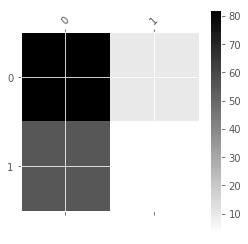

In [98]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

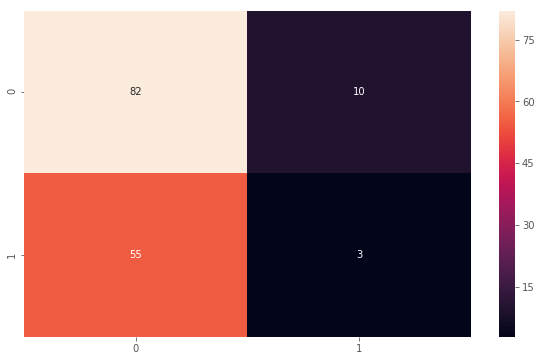

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm =confusion_matrix(test1, predictions1) 
index = ['0','1']#,'sad']  
columns = ['0','1']
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

In [6]:
predicted_aspects

[['FOOD#TASTE']]


In [75]:
train_aspects

[{'Negative Opinion', 'Off-flight service'},
 {'Off-flight service'},
 {'Bookings', 'Off-flight service'},
 {'Bookings'},
 {'Bookings', 'Negative Opinion'},
 {'Off-flight service'},
 {'Bookings'},
 {'Bookings', 'Off-flight service'},
 {'Cabin', 'Negative Opinion', 'Seat', 'Staff'},
 {'Bookings', 'Negative Opinion'},
 {'Bookings', 'Entertainment'},
 {'Bookings', 'Food', 'Seat'},
 {'Negative Opinion', 'Off-flight service'},
 {'Off-flight service'},
 {'Bookings', 'Off-flight service'},
 {'Cabin', 'Negative Opinion', 'Seat', 'Staff'},
 {'Bookings', 'Negative Opinion'},
 {'Bookings', 'Entertainment'},
 {'Bookings', 'Food', 'Seat'},
 {'Food', 'Inflight-service', 'Positive Opinion'},
 {'Bookings'},
 {'Off-flight service', 'Possession', 'Seat'},
 {'Bookings', 'Entertainment', 'Food', 'Positive Opinion', 'Seat', 'Staff'},
 {'Bookings', 'Food', 'Off-flight service', 'Seat'},
 {'Bookings', 'Off-flight service'},
 {'Off-flight service', 'Positive Opinion'},
 {'Food', 'Staff'},
 {'Off-flight servic

In [107]:
def getPredictions2(x_train, x_test, train, test):
	embedding_dim = 200
	embedding_matrix = create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, embedding_dim)
	model = LogisticRegression( C=100000)#fit_intercept=False)
	model.fit(x_train, train)#, epochs = 20, verbose = False, validation_data = (x_test, test), batch_size = 10)
	
	    
	val = model.evaluate(x_test, test)#, verbose = False)
	predictions = model.predict(x_test)
	return predictions
	

In [108]:
predictions1 = getPredictions2(x_train, x_test, train1, test1)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [160]:
predictions1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [161]:
array(test1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0])

# Implicit aspect level

In [21]:
import pandas as pd

In [22]:
seat_list=[]
seat_aspect_list=[]

df=pd.read_csv(r"C:/Users/Vaibhav/Documents/GitHub/Aspect-Based-Sentiment-Analysis/data/restaurants/Seat1.csv")
df1=df[df['Aspect'].notna()]
df1=df1[df1['Seat'].notna()]
seat_list.extend(df1['Seat'])
#aspect_list=list(df1['Aspect'])
for asp in df1['Aspect']:
    seat_aspect_list.append(set([asp.lower()]))


df2=pd.read_csv(r"C:/Users/Vaibhav/Documents/GitHub/Aspect-Based-Sentiment-Analysis/data/restaurants/SeatAspects.csv")
df3=df2[df2['Group'].notna()]
df3=df3[df3['Seat'].notna()]
seat_list.extend(df3['Seat'])
#aspect_list=list(df1['Aspect'])
for asp in df3['Group']:
    seat_aspect_list.append(set([asp.lower()]))


In [23]:
seat_aspect_list

[{'comfort'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'space'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'operations'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'operations'},
 {'space'},
 {'operations'},
 {'operations'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'space'},
 {'space'},
 {'space'},
 {'comfort'},
 {'space'},
 {'operations'},
 {'operations'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'operations'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'space'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'space'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'space'},
 {'

In [241]:
len(seat_aspect_list)

771

In [76]:
len(seat_list)

771

In [24]:

train_reviews=seat_list[:600]
train_aspects=seat_aspect_list[:600]

test_reviews=seat_list[600:]
test_aspects=seat_aspect_list[600:]

In [25]:
train_aspects

[{'comfort'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'space'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'operations'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'operations'},
 {'space'},
 {'operations'},
 {'operations'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'space'},
 {'space'},
 {'space'},
 {'comfort'},
 {'space'},
 {'operations'},
 {'operations'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'comfort'},
 {'operations'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'space'},
 {'space'},
 {'comfort'},
 {'comfort'},
 {'space'},
 {'space'},
 {'comfort'},
 {'space'},
 {'comfort'},
 {'space'},
 {'

In [26]:
train_reviews

["could n't sleep",
 "was n't very comfortable",
 'downside',
 'seats are so tight',
 'like animals in transport you sit',
 'small seat you could not sleep ! very uncomfortable ! it was a very old',
 'seat ! i still have pain',
 'seats were pretty comfortable and with enough space',
 'paid for extra legroom for two seats',
 'ess legroom than a standard se',
 'chair',
 'broken mechanism',
 'kept lurching backwards',
 'uncomfortable',
 'trouble adjusting my seat',
 'leg room good',
 'specific seating selection and did not get any',
 'unfortunately we paid',
 "ca n't accommodate",
 'comfort of the seat',
 'comfortable seats',
 'broken seats',
 'seat is old',
 'seat space is excellent',
 'broken',
 'recliner button missing',
 'supreme comfort of the seating',
 'economy seats were very narrow',
 'barely much leg room',
 'seat is damage',
 'very very not comfortable',
 'seat was damaged',
 'seats they were way too narrow',
 'seats were otherwise comfortable',
 'tray-table traps you',
 'narro

In [253]:
def getPredictions2(x_train, x_test, train, test):
	embedding_dim = 200
	embedding_matrix = create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, embedding_dim)
	vstr='''model = Sequential()
	model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length = maxlen, trainable = True))
	model.add(layers.Conv1D(64, 3, activation = 'relu'))
	model.add(layers.GlobalMaxPool1D())
	model.add(layers.Dense(10, activation='relu'))
	model.add(layers.Dense(1, activation='sigmoid'))
	model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1, 'accuracy'])
	#model.summary()'''
	
	
	model = LogisticRegression( C=100000)#fit_intercept=False)
	model.fit(x_train, train)#, epochs = 20, verbose = False, validation_data = (x_test, test), batch_size = 10)
	
	    
	    
	#val = model.evaluate(x_train, train)#, verbose = False)
	#val = model.evaluate(x_test, test)#, verbose = False)

	predictions = model.predict(x_test)
	return predictions
	


In [278]:
from sklearn.ensemble import RandomForestClassifier

def getPredictions3(x_train, x_test, train, test):
	embedding_dim = 200
	embedding_matrix = create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, embedding_dim)
	model = RandomForestClassifier(n_estimators=150) 
	r'''model = Sequential()
	model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length = maxlen, trainable = True))
	model.add(layers.Conv1D(64, 3, activation = 'relu'))
	model.add(layers.GlobalMaxPool1D())
	model.add(layers.Dense(10, activation='relu'))
	model.add(layers.Dense(1, activation='sigmoid'))
	model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1, 'accuracy'])
	#model.summary()'''

	model.fit(x_train, train)#, epochs = 20, verbose = False, validation_data = (x_test, test), batch_size = 10)
	#val = model.evaluate(x_train, train, verbose = False)
	#val = model.evaluate(x_test, test, verbose = False)

	predictions = model.predict(x_test)
	return predictions

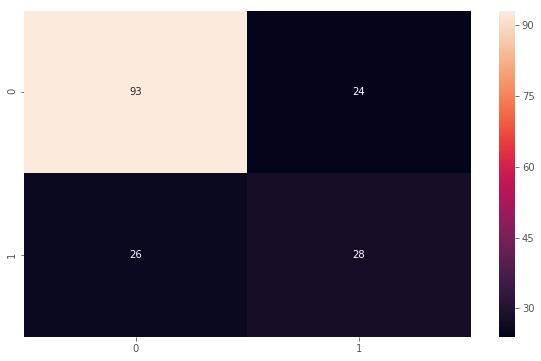

In [284]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm =confusion_matrix(test3, predictions3) 
index = ['0','1']#,'sad']  
columns = ['0','1']
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

In [255]:
i

170

In [256]:
predictions2

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [257]:
array(test2)

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [268]:
predictions1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [259]:
array(test1)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [266]:
predictions3

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [267]:
array(test3)

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [285]:
train_reviews

["could n't sleep",
 "was n't very comfortable",
 'downside',
 'seats are so tight',
 'like animals in transport you sit',
 'small seat you could not sleep ! very uncomfortable ! it was a very old',
 'seat ! i still have pain',
 'seats were pretty comfortable and with enough space',
 'paid for extra legroom for two seats',
 'ess legroom than a standard se',
 'chair',
 'broken mechanism',
 'kept lurching backwards',
 'uncomfortable',
 'trouble adjusting my seat',
 'leg room good',
 'specific seating selection and did not get any',
 'unfortunately we paid',
 "ca n't accommodate",
 'comfort of the seat',
 'comfortable seats',
 'broken seats',
 'seat is old',
 'seat space is excellent',
 'broken',
 'recliner button missing',
 'supreme comfort of the seating',
 'economy seats were very narrow',
 'barely much leg room',
 'seat is damage',
 'very very not comfortable',
 'seat was damaged',
 'seats they were way too narrow',
 'seats were otherwise comfortable',
 'tray-table traps you',
 'narro

In [272]:
correct

{'operations'}

In [286]:
x_train


array([[ 62,  63,  35, ...,   0,   0,   0],
       [  6,  63,   4, ...,   0,   0,   0],
       [178,   0,   0, ...,   0,   0,   0],
       ...,
       [ 92, 448,   0, ...,   0,   0,   0],
       [ 65,  66,   6, ...,   0,   0,   0],
       [450,  23, 451, ...,   0,   0,   0]])

# Contents:

#1. DepTag
#2. embed matrix
#3. combine 1 and 2
#4. main classification code

In [ ]:
#Vectorizing data
vectorizer = CountVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer.fit(train_reviews)

x_train = vectorizer.transform(train_reviews)
x_test = vectorizer.transform(test_reviews)

input_dim = x_train.shape[1]

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_reviews)

 
vocab_size = len(tokenizer.word_index) + 1 

maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)

In [287]:
vectorizer = CountVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer.fit(train_reviews)

x_train = vectorizer.transform(train_reviews)

In [288]:
x_train

<600x830 sparse matrix of type '<class 'numpy.int64'>'
	with 1879 stored elements in Compressed Sparse Row format>

In [58]:
import glob


import json
path=r'C:\Users\Vaibhav\Documents\Practicum\DepTag\DepTag\TripAdvisor'

files = glob.glob(path+r'/*.json') #--> Change Path



finInfo = []
for i in range(len(files)):
  for line in open(files[i], encoding='utf-8'):
    info = json.loads(line) 
  finInfo.append(info)



len(finInfo)# --> 21



finDet = []
for i in range(len(finInfo)):
  info = finInfo[i]
  det = []
  for j in range(len(info)):
    if (info[j]['Details'] != []):
      d = info[j]['Details']
      det.append(d)
  finDet.append(det)


len(finDet)# --> 21




import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
newStop = ['was', 'and', 'the', 'to', 'in', 'of', 'a', 'an', 'is', 'were', 'for', 'with', 'are', 'one', 'our', 'gave', 'have',
           'me', 'an', 'i', 'or', 'had', 'did', 'get', 'made', 'take', 'given', 'told', 'let', 'us', "n't"]
stop_words = stop_words+newStop




nls = []
for i in range(len(finDet)):
  detail = finDet[i]
  for j in range(len(detail)):
    for k in range(len(detail[j])):
      if (detail[j][k][0] == 0 and detail[j][k][1][0] not in stop_words and detail[j][k][2][0] not in stop_words):
        wrd = detail[j][k][1][0]
        wrdPos = detail[j][k][1][1]
        pol = detail[j][k][1][-1]
        depWrd = detail[j][k][2][0]
        depWrdPos = detail[j][k][2][-1]
        rel = detail[j][k][-2]
        lbl = detail[j][k][-1]
        a = (wrd, wrdPos, pol, depWrd, depWrdPos, rel, lbl)
      elif (detail[j][k][0] == 1 and detail[j][k][1][0] not in stop_words and detail[j][k][2][0] not in stop_words):
        wrd = detail[j][k][2][0]
        wrdPos = detail[j][k][2][1]
        pol = detail[j][k][2][-1]
        depWrd = detail[j][k][1][0]
        depWrdPos = detail[j][k][1][-1]
        rel = detail[j][k][-2]
        lbl = detail[j][k][-1]
        a = (wrd, wrdPos, pol, depWrd, depWrdPos, rel, lbl)
      nls.append(a)




newLs = []
for i in range(len(nls)):
  if (nls[i][0] and nls[i][3] not in stop_words):
    newLs.append(nls[i])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
import glob


import json
path=r'C:\Users\Vaibhav\Documents\Practicum\DepTag\DepTag\TripAdvisor'

files = glob.glob(path+r'/*.json') #--> Change Path



In [53]:
finInfo = []
for i in range(len(files)):
  for line in open(files[i], encoding='utf-8'):
    info = json.loads(line) 
  finInfo.append(info)



len(finInfo)

11

In [56]:
finInfo[1]

[{'Details': [[1, ['refunded', 'VBN'], ['not', 'RB', 0.0], 'advmod', 'b'],
   [0, ['contact', 'VB', 0.0], ['to', 'TO'], 'mark', 'o'],
   [1, ['way', 'NN'], ['no', 'DT', -0.3], 'det', 'o'],
   [1, ['contact', 'VB'], ['to', 'TO', 0.0], 'mark', 'o'],
   [1, ['refunded', 'VBN'], ['contact', 'VB', 0.0], 'xcomp', 'o'],
   [1, ['cc', 'NN'], ['way', 'NN', 0.0], 'dep', 'o'],
   [1, ['cancelled', 'VBD'], ['refunded', 'VBN', 0.0], 'conj:and', 'b'],
   [0, ['contact', 'VB', 0.0], ['money', 'NN'], 'nsubj:xsubj', 'b'],
   [0, ['refunded', 'VBN', 0.0], ['contact', 'VB'], 'xcomp', 'o'],
   [0, ['refunded', 'VBN', 0.0], ['money', 'NN'], 'nsubj', 'b'],
   [1, ['refunded', 'VBN'], ['still', 'RB', 0.0], 'advmod', 'b'],
   [0, ['cancelled', 'VBD', -0.25], ['refunded', 'VBN'], 'conj:and', 'b'],
   [1, ['contact', 'VB'], ['money', 'NN', 0.0], 'nsubj:xsubj', 'b'],
   [1, ['used', 'VBN'], ['time', 'NN', 0.0], 'parataxis', 'o'],
   [0, ['contact', 'VB', 0.0], ['to', 'IN'], 'mark', 'o']],
  'Labels': [{'Bookings

In [55]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
newStop = ['was', 'and', 'the', 'to', 'in', 'of', 'a', 'an', 'is', 'were', 'for', 'with', 'are', 'one', 'our', 'gave', 'have',
           'me', 'an', 'i', 'or', 'had', 'did', 'get', 'made', 'take', 'given', 'told', 'let', 'us', "n't"]
stop_words = stop_words+newStop



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
newLs

[('service', 'NN', 0.0, 'policy', 'NN', 'dep', 'o'),
 ('poor', 'JJ', -0.48, 'policy', 'NN', 'dep', 'o'),
 ('policy', 'NN', 0.0, 'poor', 'JJ', 'dep', 'o'),
 ('policy', 'NN', 0.0, 'poor', 'JJ', 'dep', 'o'),
 ('customer', 'NN', 0.0, 'service', 'NN', 'compound', 'o'),
 ('refund', 'NN', 0.0, 'policy', 'NN', 'compound', 'o'),
 ('refund', 'NN', 0.0, 'policy', 'NN', 'compound', 'o'),
 ('policy', 'NN', 0.0, 'refund', 'NN', 'compound', 'o'),
 ('policy', 'NN', 0.0, 'refund', 'NN', 'compound', 'o'),
 ('policy', 'NN', 0.0, 'service', 'NN', 'dep', 'o'),
 ('service', 'NN', 0.0, 'policy', 'NN', 'dep', 'o'),
 ('refuse', 'VBP', -0.3, 'illegal', 'JJ', 'dep', 'o'),
 ('steal', 'VBP', -0.49, 'money', 'NN', 'obj', 'o'),
 ('steal', 'VBP', -0.49, 'money', 'NN', 'obj', 'o'),
 ('booking', 'VBG', 0.0, 'steal', 'VBP', 'dep', 'o'),
 ('cancelled', 'VBN', -0.25, 'booking', 'VBG', 'conj:and', 'o'),
 ('refuse', 'VBP', -0.3, 'refund', 'VB', 'xcomp', 'o'),
 ('steal', 'VBP', -0.49, 'illegal', 'JJ', 'dep', 'o'),
 ('steal',

In [61]:
pd.DataFrame(newLs)

0    1     2           3    4          5   6
0        service   NN  0.00      policy   NN        dep   o
1           poor   JJ -0.48      policy   NN        dep   o
2         policy   NN  0.00        poor   JJ        dep   o
3         policy   NN  0.00        poor   JJ        dep   o
4       customer   NN  0.00     service   NN   compound   o
5         refund   NN  0.00      policy   NN   compound   o
6         refund   NN  0.00      policy   NN   compound   o
7         policy   NN  0.00      refund   NN   compound   o
8         policy   NN  0.00      refund   NN   compound   o
9         policy   NN  0.00     service   NN        dep   o
10       service   NN  0.00      policy   NN        dep   o
11        refuse  VBP -0.30     illegal   JJ        dep   o
12         steal  VBP -0.49       money   NN        obj   o
13         steal  VBP -0.49       money   NN        obj   o
14       booking  VBG  0.00       steal  VBP        dep   o
15     cancelled  VBN -0.25     booking  VBG   conj:and   o
16        refuse  VBP -0.30      refund   VB      xcomp   o
17         steal  VBP -0.49     illegal   JJ        dep   o
18         steal  VBP -0.49     illegal   JJ        dep   o
19         steal  VBP -0.49   cancelled  VBN        dep   o
20         steal  VBP -0.49   cancelled  VBN        dep   o
21        refund   VB  0.00       money   NN        obj   o
22         steal  VBP -0.49      refuse  VBP   conj:and   o
23         money   NN  0.00      refund   VB        obj   o
24       booking  VBG  0.00   cancelled  VBN   conj:and   o
25        refund   VB  0.00      refuse  VBP      xcomp   o
26       voucher   NN  0.00  acceptable   JJ  acl:relcl   b
27       voucher   NN  0.00  acceptable   JJ  acl:relcl   b
28       offered  VBD  0.00     voucher   NN        obj   b
29       offered  VBD  0.00     voucher   NN        obj   b
...          ...  ...   ...         ...  ...        ...  ..
13730       food   NN  0.00         two   CD        dep   f
13731       food   NN  0.00         two   CD        dep   f
13732       food   NN  0.00         two   CD        dep   f
13733       food   NN  0.00         two   CD        dep   f
13734       food   NN  0.00         two   CD        dep   f
13735      fresh   JJ  0.32        food   NN       amod   f
13736      fresh   JJ  0.32        food   NN       amod   f
13737      fresh   JJ  0.32        food   NN       amod   f
13738      fresh   JJ  0.32        food   NN       amod   f
13739  efficient   JJ  0.42    boarding  VBG  parataxis   o
13740  excellent   JJ  0.57    boarding  VBG   conj:and   o
13741  excellent   JJ  0.57    boarding  VBG   conj:and   o
13742   boarding  VBG  0.00   efficient   JJ  parataxis   o
13743       nice   JJ  0.42   efficient   JJ  parataxis   c
13744        hot   JJ  0.00      snacks  NNS       amod   f
13745        hot   JJ  0.00      snacks  NNS       amod   f
13746        hot   JJ  0.00      snacks  NNS       amod   f
13747   friendly   JJ  0.49   efficient   JJ   conj:and  st
13748     smooth   JJ  0.00       check   NN       amod   o
13749     snacks  NNS  0.00       liked  VBD      nsubj   f
13750     snacks  NNS  0.00       liked  VBD      nsubj   f
13751      clean   JJ  0.40    aircraft   NN      nsubj   c
13752      clean   JJ  0.40    aircraft   NN      nsubj   c
13753      clean   JJ  0.40   efficient   JJ  parataxis   c
13754  efficient   JJ  0.42       clean   JJ  parataxis   c
13755       nice   JJ  0.42    aircraft   NN      nsubj   c
13756  efficient   JJ  0.42    friendly   JJ   conj:and  st
13757  efficient   JJ  0.42        nice   JJ  parataxis   c
13758   aircraft   NN  0.00       clean   JJ      nsubj   c
13759       nice   JJ  0.42       clean   JJ   conj:and   c

[13760 rows x 7 columns]

### Embedding

In [62]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [63]:
embeddings_dict = {}
with open(r"C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\glove.6B.200d.txt", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        token = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[token] = vector

In [4]:
embeddings_dict

{'the': array([-7.1549e-02,  9.3459e-02,  2.3738e-02, -9.0339e-02,  5.6123e-02,
         3.2547e-01, -3.9796e-01, -9.2139e-02,  6.1181e-02, -1.8950e-01,
         1.3061e-01,  1.4349e-01,  1.1479e-02,  3.8158e-01,  5.4030e-01,
        -1.4088e-01,  2.4315e-01,  2.3036e-01, -5.5339e-01,  4.8154e-02,
         4.5662e-01,  3.2338e+00,  2.0199e-02,  4.9019e-02, -1.4132e-02,
         7.6017e-02, -1.1527e-01,  2.0060e-01, -7.7657e-02,  2.4328e-01,
         1.6368e-01, -3.4118e-01, -6.6070e-02,  1.0152e-01,  3.8232e-02,
        -1.7668e-01, -8.8153e-01, -3.3895e-01, -3.5481e-02, -5.5095e-01,
        -1.6899e-02, -4.3982e-01,  3.9004e-02,  4.0447e-01, -2.5880e-01,
         6.4594e-01,  2.6641e-01,  2.8009e-01, -2.4625e-02,  6.3302e-01,
        -3.1700e-01,  1.0271e-01,  3.0886e-01,  9.7792e-02, -3.8227e-01,
         8.6552e-02,  4.7075e-02,  2.3511e-01, -3.2127e-01, -2.8538e-01,
         1.6670e-01, -4.9707e-03, -6.2714e-01, -2.4904e-01,  2.9713e-01,
         1.4379e-01, -1.2325e-01, -5.8178e-0

In [ ]:
def find_closest_embeddings(embedding, cutoff=25):
    return sorted(embeddings_dict.keys(), key=lambda token: spatial.distance.euclidean(embeddings_dict[token], embedding))

In [43]:
len(embeddings_dict['there'].reshape(-1,1))

200

In [44]:
len(embeddings_dict['the'].reshape(-1,1))

200

In [6]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
	vocab_size = len(word_index) + 1
	embedding_matrix = np.zeros((vocab_size, embedding_dim))
	
	with open(filepath, encoding='utf-8') as f:
		for line in f:
			word, *vector = line.split()
			if word in word_index:
				idx = word_index[word]
				embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

	return embedding_matrix

In [9]:
create_embedding_matrix(r"C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\glove.6B.200d.txt",'the',50)

In [ ]:
vectorizer = CountVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer.fit(train_reviews)

x_train = vectorizer.transform(train_reviews)
x_test = vectorizer.transform(test_reviews)

input_dim = x_train.shape[1]

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_reviews)

 
vocab_size = len(tokenizer.word_index) + 1 

maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)


In [32]:
train_reviews

["could n't sleep",
 "was n't very comfortable",
 'downside',
 'seats are so tight',
 'like animals in transport you sit',
 'small seat you could not sleep ! very uncomfortable ! it was a very old',
 'seat ! i still have pain',
 'seats were pretty comfortable and with enough space',
 'paid for extra legroom for two seats',
 'ess legroom than a standard se',
 'chair',
 'broken mechanism',
 'kept lurching backwards',
 'uncomfortable',
 'trouble adjusting my seat',
 'leg room good',
 'specific seating selection and did not get any',
 'unfortunately we paid',
 "ca n't accommodate",
 'comfort of the seat',
 'comfortable seats',
 'broken seats',
 'seat is old',
 'seat space is excellent',
 'broken',
 'recliner button missing',
 'supreme comfort of the seating',
 'economy seats were very narrow',
 'barely much leg room',
 'seat is damage',
 'very very not comfortable',
 'seat was damaged',
 'seats they were way too narrow',
 'seats were otherwise comfortable',
 'tray-table traps you',
 'narro

In [29]:
vectorizer = CountVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer.fit(train_reviews)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [30]:
x_train = vectorizer.transform(train_reviews)
x_test = vectorizer.transform(test_reviews)

In [31]:
x_train

<600x830 sparse matrix of type '<class 'numpy.int64'>'
	with 1879 stored elements in Compressed Sparse Row format>

In [33]:
input_dim = x_train.shape[1]

In [34]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_reviews)

In [36]:
tokenizer.word_index

{'a': 19,
 'able': 286,
 'abled': 283,
 'above': 321,
 'absolutely': 264,
 'abysmal': 250,
 'access': 316,
 'accommodate': 198,
 'accordingly': 258,
 'addition': 373,
 'adequate': 425,
 'adjacent': 336,
 'adjustable': 219,
 'adjusting': 194,
 'aisle': 50,
 'all': 380,
 'allocations': 385,
 'almost': 135,
 'also': 266,
 'always': 335,
 'amazingly': 296,
 'amount': 398,
 'ample': 298,
 'and': 24,
 'angled': 383,
 'animals': 179,
 'any': 64,
 'are': 17,
 'areas': 426,
 'arm': 115,
 'armrest': 382,
 'armrests': 253,
 'around': 417,
 'arranged': 270,
 'arrangement': 294,
 'assigned': 144,
 'at': 403,
 'attendant': 413,
 'available': 152,
 'average': 85,
 'baby': 431,
 'back': 34,
 'backs': 322,
 'backwards': 192,
 'barely': 125,
 'bassinet': 44,
 'be': 59,
 'bed': 60,
 'beds': 448,
 'behind': 311,
 'being': 419,
 'below': 360,
 'beside': 279,
 'best': 69,
 'better': 70,
 'between': 344,
 'big': 156,
 'bigger': 148,
 'bit': 94,
 'bits': 450,
 'blanket': 303,
 'book': 140,
 'booked': 134,
 'b

In [1]:
vectorizer = CountVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer.fit(train_reviews)

x_train = vectorizer.transform(train_reviews)
x_test = vectorizer.transform(test_reviews)

input_dim = x_train.shape[1]

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_reviews)

 
vocab_size = len(tokenizer.word_index) + 1 

maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)


In [38]:
def getLabels(aspects):
	#print(unique_aspects)
	#Create train labels
	restaurant_general = []
	food_quality = []
	restaurant_misc = []
	food_prices = []
	drinks_quality = []
	location_general = []
	restaurant_prices = []
	ambience_general = []
	drinks_style_options = []
	service_general = []
	drinks_prices = []
	food_style_options = []
###
	for aspect in aspects:
		if 'Food' in aspect:
			restaurant_general.append(1)
		else:
			restaurant_general.append(0)
			
		if 'Entertainment' in aspect:
			food_quality.append(1)
		else:
			food_quality.append(0)
			
		if 'Bookings' in aspect:
			restaurant_misc.append(1)
		else:
			restaurant_misc.append(0)
#			
		if 'Inflight-service' in aspect:
			food_prices.append(1)
		else:
			food_prices.append(0)
			
		if 'Possession' in aspect:
			drinks_quality.append(1)
		else:
			drinks_quality.append(0)
			
		if 'Staff' in aspect:
			location_general.append(1)
		else:
			location_general.append(0)
			
		if 'Cabin' in aspect:
			restaurant_prices.append(1)
		else:
			restaurant_prices.append(0)
			
		if 'Entertainment' in aspect:
			ambience_general.append(1)
		else:
			ambience_general.append(0)
			
		if 'Off-flight service' in aspect:
			drinks_style_options.append(1)
		else:
			drinks_style_options.append(0)
			
		if 'Neutral opinion' in aspect:
			service_general.append(1)
		else:
			service_general.append(0)
			
		if 'Positive opinion' in aspect:
			drinks_prices.append(1)
		else:
			drinks_prices.append(0)
			
		if 'Negative opinion' in aspect:
			food_style_options.append(1)
		else:
			food_style_options.append(0)
#				
	return restaurant_general, food_quality, restaurant_misc, food_prices, drinks_quality, location_general, restaurant_prices, ambience_general, drinks_style_options,service_general, drinks_prices, food_style_options
	
#Test and Train labels
test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11, test12 = getLabels(test_aspects)
#''', test4, test5, test6, test7, test8, test9, test10, test11, test12'''
test_labels = [test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11, test12]

train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12 = getLabels(train_aspects)
#, train4, train5, train6, train7, train8, train9, train10, train11, train12
train_labels = [train1, train2, train3, train4, train5, train6, train7, train8, train9, train10, train11, train12]

#Vectorizing data
vectorizer = CountVectorizer(analyzer='word', lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer.fit(train_reviews)

x_train = vectorizer.transform(train_reviews)
x_test = vectorizer.transform(test_reviews)

input_dim = x_train.shape[1]

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_reviews)

x_train = tokenizer.texts_to_sequences(train_reviews)
x_test = tokenizer.texts_to_sequences(test_reviews)
vocab_size = len(tokenizer.word_index) + 1 

maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)


In [39]:
tokenizer.word_index

{'a': 19,
 'able': 286,
 'abled': 283,
 'above': 321,
 'absolutely': 264,
 'abysmal': 250,
 'access': 316,
 'accommodate': 198,
 'accordingly': 258,
 'addition': 373,
 'adequate': 425,
 'adjacent': 336,
 'adjustable': 219,
 'adjusting': 194,
 'aisle': 50,
 'all': 380,
 'allocations': 385,
 'almost': 135,
 'also': 266,
 'always': 335,
 'amazingly': 296,
 'amount': 398,
 'ample': 298,
 'and': 24,
 'angled': 383,
 'animals': 179,
 'any': 64,
 'are': 17,
 'areas': 426,
 'arm': 115,
 'armrest': 382,
 'armrests': 253,
 'around': 417,
 'arranged': 270,
 'arrangement': 294,
 'assigned': 144,
 'at': 403,
 'attendant': 413,
 'available': 152,
 'average': 85,
 'baby': 431,
 'back': 34,
 'backs': 322,
 'backwards': 192,
 'barely': 125,
 'bassinet': 44,
 'be': 59,
 'bed': 60,
 'beds': 448,
 'behind': 311,
 'being': 419,
 'below': 360,
 'beside': 279,
 'best': 69,
 'better': 70,
 'between': 344,
 'big': 156,
 'bigger': 148,
 'bit': 94,
 'bits': 450,
 'blanket': 303,
 'book': 140,
 'booked': 134,
 'b

In [45]:

z=create_embedding_matrix(r'C:\Users\Vaibhav\Documents\GitHub\Aspect-Based-Sentiment-Analysis\data\restaurants\glove.6B.200d.txt', tokenizer.word_index, 50)

In [46]:
z.data

In [47]:
type(z)

numpy.ndarray

In [49]:
type(z.data)

memoryview

In [65]:
vectorizer.transform(['there'])

<1x830 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [68]:
tokenizer.texts_to_sequences(['food']) # do for every word in df

[[452]]

In [69]:
train_reviews

["could n't sleep",
 "was n't very comfortable",
 'downside',
 'seats are so tight',
 'like animals in transport you sit',
 'small seat you could not sleep ! very uncomfortable ! it was a very old',
 'seat ! i still have pain',
 'seats were pretty comfortable and with enough space',
 'paid for extra legroom for two seats',
 'ess legroom than a standard se',
 'chair',
 'broken mechanism',
 'kept lurching backwards',
 'uncomfortable',
 'trouble adjusting my seat',
 'leg room good',
 'specific seating selection and did not get any',
 'unfortunately we paid',
 "ca n't accommodate",
 'comfort of the seat',
 'comfortable seats',
 'broken seats',
 'seat is old',
 'seat space is excellent',
 'broken',
 'recliner button missing',
 'supreme comfort of the seating',
 'economy seats were very narrow',
 'barely much leg room',
 'seat is damage',
 'very very not comfortable',
 'seat was damaged',
 'seats they were way too narrow',
 'seats were otherwise comfortable',
 'tray-table traps you',
 'narro

In [71]:
df1=df[df['Aspect'].notna()]

In [75]:
df1['Aspect'].apply(lambda x: tokenizer.texts_to_sequences([x]))

3       [[25]]
4       [[25]]
47      [[25]]
90      [[15]]
91      [[15]]
95      [[25]]
96      [[15]]
102     [[25]]
104       [[]]
105     [[15]]
115     [[25]]
116     [[25]]
117     [[25]]
118     [[25]]
128       [[]]
145     [[15]]
146       [[]]
147       [[]]
149     [[15]]
168     [[25]]
178     [[25]]
180     [[25]]
188     [[25]]
191     [[15]]
196     [[25]]
197     [[25]]
210     [[25]]
216     [[15]]
217     [[15]]
222     [[25]]
         ...  
5933      [[]]
5955    [[25]]
6684    [[25]]
6685    [[25]]
6695    [[25]]
6706    [[25]]
6729      [[]]
6743    [[25]]
6765      [[]]
6772    [[25]]
6773    [[25]]
6779    [[25]]
6785      [[]]
6796      [[]]
7418    [[25]]
7420    [[25]]
7438    [[15]]
7439    [[15]]
7443    [[25]]
7445    [[25]]
7447    [[25]]
7456    [[25]]
7460    [[25]]
7463    [[15]]
7477    [[25]]
7492    [[25]]
7494    [[25]]
7506    [[25]]
7507    [[15]]
7509    [[25]]
Name: Aspect, Length: 253, dtype: object